In [1]:
import numpy as np

def gradient_descent_linear_solver(A, b, x0, num_epochs=100, tol=1e-5):
    #x0 = np.zeros((len(A), 1))
    x = []
    x.append(x0.T)
    for k in range(num_epochs):
        # The gradient direction
        d = A.dot(x[k]) - b
        if np.linalg.norm(d) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
        alpha = np.linalg.norm(d)**2 / ((d.T).dot(A).dot(d))
        x.append(x[k] - alpha * d)
        
    return x[k], x 

### Min $f(x, y) = \left(x + 2 y - 7\right)^{2} + \left(2 x + y - 5\right)^{2}$

In [2]:
import sympy
sympy.init_printing()

x, y = sympy.symbols("x, y")
f_sym = (x + 2 * y - 7)**2 + (2 * x + y - 5)**2
f_sym.expand()

In [3]:
f_mat = sympy.Matrix([f_sym])
f_jaco = f_mat.jacobian([x, y])
f_jaco

[10⋅x + 8⋅y - 34  8⋅x + 10⋅y - 38]

In [4]:
A, b = sympy.linear_eq_to_matrix(f_jaco, [x, y])
A, b

⎛⎡10  8 ⎤  ⎡34⎤⎞
⎜⎢      ⎥, ⎢  ⎥⎟
⎝⎣8   10⎦  ⎣38⎦⎠

In [5]:
X = sympy.Matrix([x, y])
F = 1 / 2 *X.T * A * X - b.T * X
sympy.simplify(F)

⎡     2                           2         ⎤
⎣5.0⋅x  + 8.0⋅x⋅y - 34.0⋅x + 5.0⋅y  - 38.0⋅y⎦

In [6]:
constant = f_sym.expand() - sympy.simplify(F)[0]
constant

In [7]:
A = np.array(A).astype(np.float)
b = np.array(b).astype(np.float)

In [8]:
mini, minis = gradient_descent_linear_solver(A, b, x0=np.array([[-10, -10]]))
mini

The number of iteration: 6


array([[1.00000033],
       [2.99999967]])

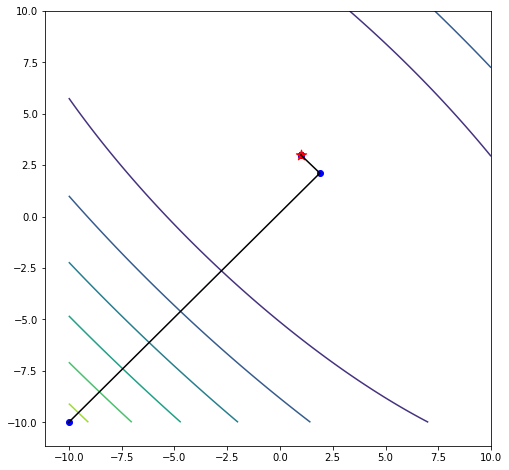

In [10]:
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = (X + 2 * Y - 7)**2 + (2 * X + Y - 5)**2

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z)
for m in minis:
    plt.scatter(m[0], m[1], c="blue")
plt.plot(np.array(minis)[:,0], np.array(minis)[:,1], 'black')
plt.scatter(mini[0], mini[1], c="red", marker="*", s=120)
plt.show()

### Convergence

In [11]:
np.linalg.cond(A)